In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../../")
from DanceProj1.DanceObj import Dance
from DanceProj1.data_proc import get_data, data_to_features

In [2]:
aistpath = '../../aist_keypoints'      #path to 3d keypoints data
dataBM, dataFM = get_data(aistpath)    #get data

In [126]:
breakdataid = pd.DataFrame(dataFM['Break'], columns=['pose', 'id'])
breakdata = breakdataid['pose']
breakdata[4].shape



(15, 2302, 3)

In [4]:
breakdataid.head()
#hmm check out breakdata[4]

,pose,id
0,"[[[-37.2453321280263, 164.81916088945948, -7.4...",gBR_sFM_cAll_d05_mBR2_ch09
1,"[[[-28.104818974028607, 170.73762056099753, 19...",gBR_sFM_cAll_d04_mBR5_ch06
2,"[[[-9.474825950224703, 196.02542995262422, 0.2...",gBR_sFM_cAll_d06_mBR2_ch16
3,"[[[-7.053650571821774, 211.45426304109083, 17....",gBR_sFM_cAll_d04_mBR3_ch04
4,"[[[-34.06971385193801, 143.944929665691, -15.7...",gBR_sFM_cAll_d04_mBR2_ch03


In [5]:
housedata = pd.DataFrame(dataFM['House'], columns=['pose', 'id'])
housedata = housedata['pose']
housedata[0].shape

(15, 1919, 3)

In [6]:
popdata = pd.DataFrame(dataFM['Pop'], columns=['pose', 'id'])
popdata = popdata['pose']
popdata[0].shape

(15, 1771, 3)

In [7]:
breakdata[0][14].T[1].shape

(2302,)

In [52]:
breakvel0 = np.diff(breakdata[5][0].T[0])  
print(breakvel0.shape)
breakacc0 = np.diff(breakvel0)
print(breakacc0.shape)
housevel0 = np.diff(housedata[5][0].T[0])
houseacc0 = np.diff(housevel0)
print(housevel0.shape)
popvel0 = np.diff(popdata[5][0].T[0])
popacc0 = np.diff(popvel0)


(1918,)
(1917,)
(1841,)


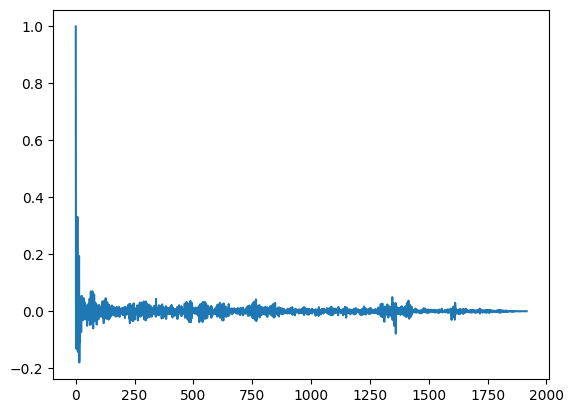

In [151]:
from scipy import signal
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
#find and plot autocorrelation of breakdata[0][13]
x = np.correlate(breakacc0, breakacc0, mode='full')
x = x[x.size//2:] #take only positive lags
x = x / x[0] #normalize
#plot autocorrelation
plt.plot(x)
plt.show()



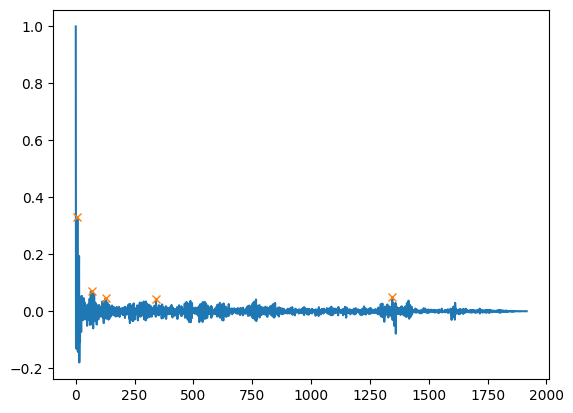

In [152]:
#find peaks, leftbases and rightbases in autocorrelation coefficients
peaks, _ = find_peaks(x, prominence=.08, distance=30) #
#plot peaks on autocorrelation coefficients
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

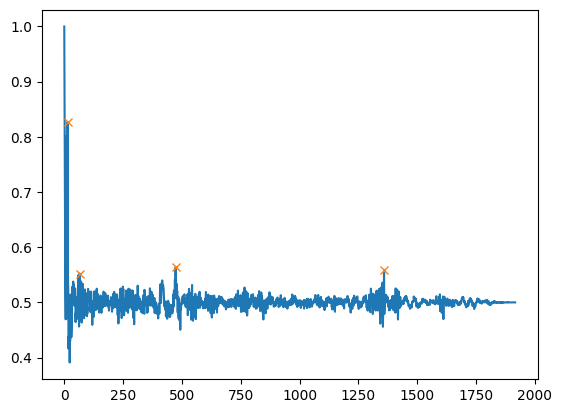

In [153]:
#positive integral of autocorrelation coefficients
posint = np.cumsum(x)
#plot positive integral of autocorrelation coefficients
plt.plot(posint)

ppeaks, _ = find_peaks(posint, prominence=.08, distance=30) #
plt.plot(ppeaks, posint[ppeaks], "x")
plt.show()

In [114]:
#5 features: spacing approximates inverse of density+locality, std*len(x) approximates variance, 
# len(ppeaks) approximates number of peaks, hit apporximates first/second movement self-similarity 
spacing = np.log((len(x) * peaks[-2]) / len(peaks))
onehit = (posint[ppeaks[0]] - posint[ppeaks].mean()) 
twohit = (posint[ppeaks[1]] - posint[ppeaks].mean()) 
print(spacing, x.std()*len(x), len(ppeaks), onehit, twohit)

13.153228122647484 55.06086803601828 4 0.20163902595047123 -0.0729772381633359


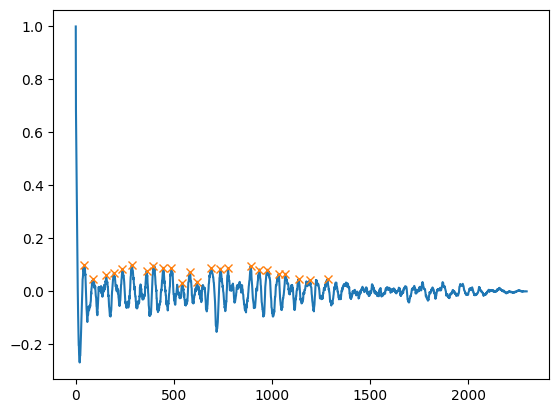

In [115]:
#find and plot autocorrelation of popdata[0][13]
x = np.correlate(popacc0, popacc0, mode='full')
x = x[x.size//2:] #take only positive lags
x = x / x[0] #normalize
#find peaks,  in autocorrelation coefficients
peaks, _ = find_peaks(x, prominence=.08, distance=30) #
#plot peaks on autocorrelation coefficients
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

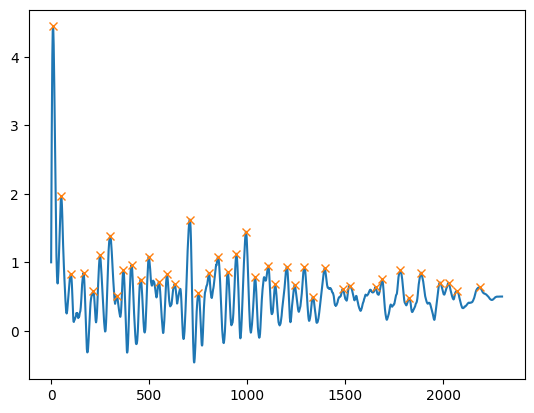

In [116]:
#positive integral of autocorrelation coefficients
posint = np.cumsum(x)
#plot positive integral of autocorrelation coefficients
plt.plot(posint)

ppeaks, _ = find_peaks(posint, prominence=.08, distance=30) #
plt.plot(ppeaks, posint[ppeaks], "x")
plt.show()

In [104]:
ppeaks[1]

51

In [117]:
#5 features: spacing approximates inverse of density+locality, std*len(x) approximates variance, 
# len(ppeaks) approximates number of peaks, hit apporximates first/second movement self-similarity 
spacing = np.log((len(x) * peaks[-1]) / len(peaks))
onehit = (posint[ppeaks[0]] - posint[ppeaks].mean()) 
twohit = (posint[ppeaks[1]] - posint[ppeaks].mean()) 
print(spacing, x.std()*len(x), len(ppeaks), onehit, twohit)

11.720346055819203 121.14905673483001 41 3.495404540958127 1.0152638354296029


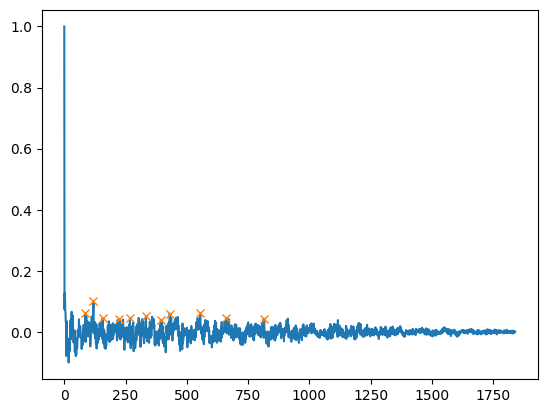

In [118]:
#find and plot autocorrelation of housedata[0][13]
x = np.correlate(houseacc0, houseacc0, mode='full')
x = x[x.size//2:] #take only positive lags
x = x / x[0] #normalize
#find peaks, leftbases and rightbases in autocorrelation coefficients
peaks, _ = find_peaks(x, prominence=.08, distance=30) #
#plot peaks on autocorrelation coefficients
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

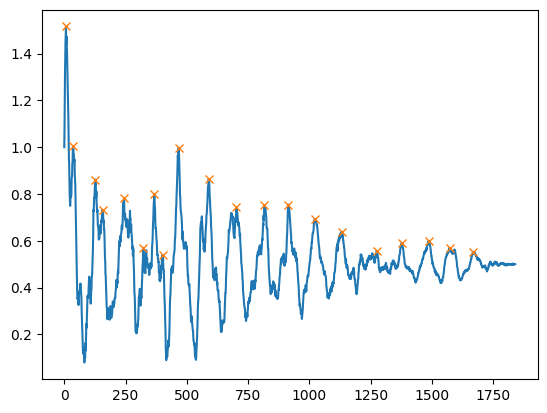

In [119]:
#positive integral of autocorrelation coefficients
posint = np.cumsum(x)
#plot positive integral of autocorrelation coefficients
plt.plot(posint)

ppeaks, _ = find_peaks(posint, prominence=.08, distance=30) #
plt.plot(ppeaks, posint[ppeaks], "x")
plt.show()

In [120]:
#5 features: spacing approximates inverse of density+locality, std*len(x) approximates variance, 
# len(ppeaks) approximates number of peaks, hit apporximates first/second movement self-similarity 
spacing = np.log((len(x) * peaks[-1]) / len(peaks))
onehit = (posint[ppeaks[0]] - posint[ppeaks].mean()) 
twohit = (posint[ppeaks[1]] - posint[ppeaks].mean()) 
print(spacing, x.std()*len(x), len(ppeaks), onehit, twohit)

11.822813691045523 55.37363498794805 20 0.7599460462452241 0.24808528887925752


In [189]:
def get_joint_corr(dance, joint1, joint2, dim, prominence=.08, distance=30):
    vel1 = np.diff(dance[joint1].T[dim])
    vel2 = np.diff(dance[joint2].T[dim])
    accel1 = np.diff(vel1)
    accel2 = np.diff(vel2)
    
    x = np.correlate(accel1, accel2, mode='full')
    x = x[x.size//2:] #take only positive lags
    x = x / x[0] #normalize

    peaks, _ = find_peaks(x, prominence=prominence, distance=distance)
    posint = np.cumsum(x)
    ppeaks, _ = find_peaks(posint, prominence=prominence, distance=distance)
    spacing = len(peaks)**2 / (peaks[-1])
    deviate = np.std(x[peaks])
    onehit = (posint[ppeaks[0]] - posint[ppeaks].mean())
    twohit = (posint[ppeaks[1]] - posint[ppeaks].mean())

    return spacing, deviate, onehit, twohit

a,b,c,d = get_joint_corr(popdata[3], 7, 8, 0)
print('spacing =', a)
print('deviate =', b)
print('onehit =', c)
print('twohit =', d)
    

spacing = 0.852863436123348
deviate = 0.3484148442104291
onehit = 22.802656305236646
twohit = 9.007718772973353


In [132]:
breakdata[3].shape

(15, 2093, 3)

In [ ]:
lankle = housedata[0][13]
rankle = housedata[0][14]
#plot difference between left and right ankle
footwidth = np.abs(lankle - rankle).mean(axis=1)
plt.plot(footwidth)
print(footwidth.mean())
print(footwidth.std())

In [ ]:
lankle = breakdata[0][13]
rankle = breakdata[0][14]
#plot difference between left and right ankle
footwidth = np.abs(lankle - rankle).mean(axis=1)
plt.plot((footwidth - footwidth.mean())/footwidth.std())
print(footwidth.mean())
print(footwidth.std())

